In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})
plt.rc('legend', fontsize=12) 

import random
from scipy.special import rel_entr

from attack_funcs import *
from dp_block_funcs import *

In [2]:
my_color_vec = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

In [3]:
################## DATA FRAME ##################
datafile = 'Data/Fitbit_Kaggle/dailyActivity_merged.csv'
all_fields = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

#pd.set_option('display.max_rows', 100)
df = pd.read_csv(datafile, skipinitialspace=True, usecols=all_fields)
fields = 'FairlyActiveMinutes'
selected_data = df[['Id',fields]]
n_rows, n_cols = df.shape

selected_data.head()

,Id,FairlyActiveMinutes
0,1503960366,13
1,1503960366,19
2,1503960366,11
3,1503960366,34
4,1503960366,10


## No Privacy Mechanism (Anonymous)

In [4]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
res_df = run_n_attacks(df, 8, sample_size=2)

SANITY CHECK:
3977333714 in training_IDs: False
2026352035 in training_IDs: False
5577150313 in training_IDs: True
4388161847 in training_IDs: True
TEST IDs:

[3977333714, 2026352035]
TEST VALS 1
[ 19  46  23  42  83  58  95  67  98   0  12  92  95   9  95  10   8  32
  52  40 143  41  96  88  55  86 116 122 115   0]

TEST VALS 2
[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Correct number of positives found (2)!
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Correct number of positives found (2)!
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Correct number of positives found (2)!
Th=5, k=20: Correct number of positives found (2)!
Th=5, k=30: Incorrect number of positives... found (1) vs expected (2)
--------------------------------------------
END OF ATTACK NUMBER 8
--------------------------------------------



In [6]:
res_df.fillna(0)
width = 0.8
num_trials = 8
my_xs = [1,5,10,20,30]
ths = [0,2,5]
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_df.loc[res_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

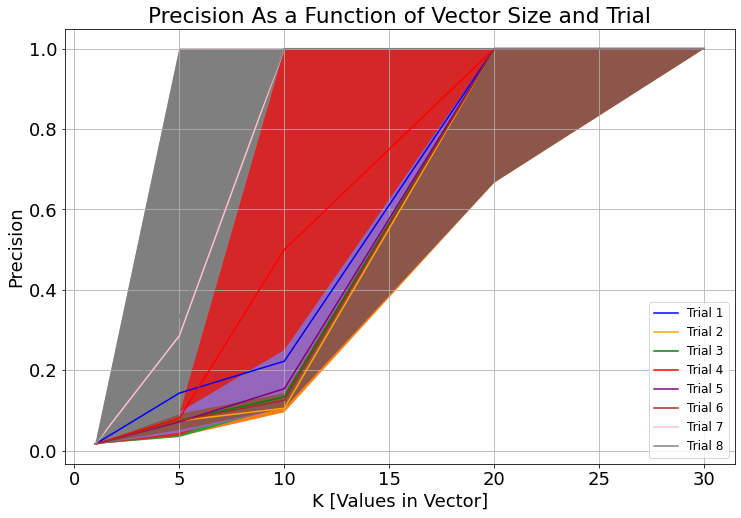

<Figure size 864x576 with 0 Axes>

In [7]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0])

ax.set_title('Precision As a Function of Vector Size and Trial')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')

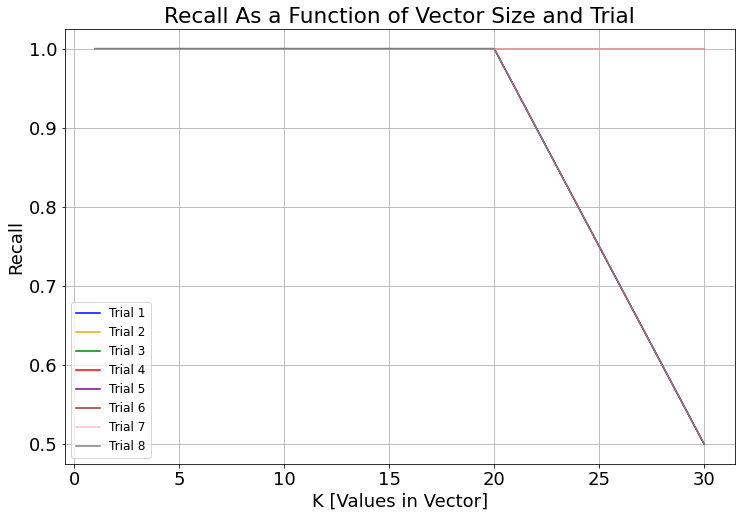

<Figure size 864x576 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1])

ax.set_title('Recall As a Function of Vector Size and Trial')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower left')
ax.grid(visible=True, which='both')

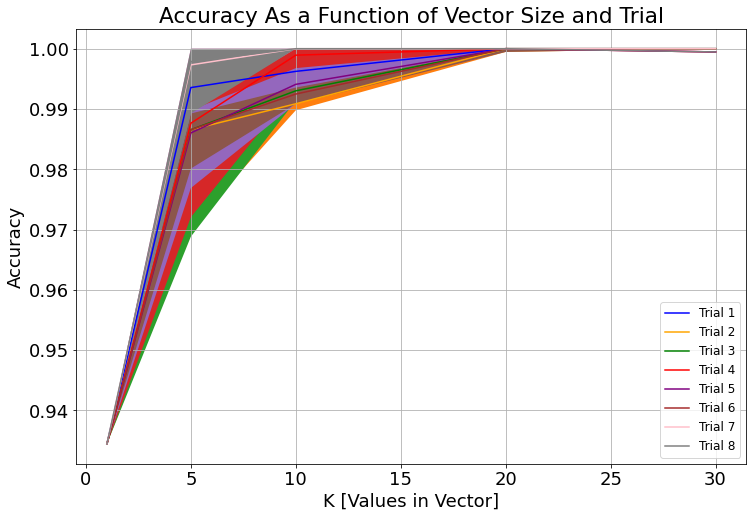

<Figure size 864x576 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2])

ax.set_title('Accuracy As a Function of Vector Size and Trial')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')

## Differential Privacy Set Up

In [10]:
values = list(selected_data['FairlyActiveMinutes'].unique())
privmax = reportNoisyMax(values, 1.0)
print(int(privmax))

142


In [11]:
#Divide the rande [0,150] into buckets of 10
blocks = list()
block = list()
for i in range(0, 151):
    block.append(i)
    if len(block)>=10:
        blocks.append(block)
        block = list()
        
IDs = selected_data['Id'].unique()
individualAct = dict()
selectedIDs = IDs
for Id in selectedIDs:
    act = selected_data[selected_data['Id']==Id]
    individualAct[Id] = act['FairlyActiveMinutes'].tolist()

In [12]:
ep_list = [0.01, 0.1, 1.0, 2.0, 5.0, 10.0]
LEP = len(ep_list)

#for i, epsilon in enumerate(ep_list):

pB=0.85
#pB = calc_pB_block(epsilon, blocks)
#pB = calc_pB_individual(epsilon, blocks, values)

#Sanitize without memoization
sanProfiles = sanitizeActProfile(IDs,individualAct,pB,blocks)
#Sanitize with memoization
sanProfilesM = sanitizeActProfile(IDs,individualAct,pB,blocks,True)

## BlockRR, No Memoization

In [13]:
P_df = pd.DataFrame()

for key in sanProfiles.keys():
    for val in sanProfiles[key]:
        P_df = P_df.append(pd.Series([key, val]), ignore_index=True)
P_df.columns = ['Id', 'FairlyActiveMinutes']

res_P_df = run_n_attacks(P_df, 8, sample_size=2)

SANITY CHECK:
1844505072.0 in training_IDs: False
6775888955.0 in training_IDs: False
8053475328.0 in training_IDs: True
2320127002.0 in training_IDs: True
TEST IDs:

[1844505072.0, 6775888955.0]
TEST VALS 1
[  3.   4. 124.   5.   8.   5.  16.   5.   6.  14.   2.  68.   6.   1.
   0.   3.   5.   8.   8.   7.   0.   6.   4.  29.   9.   8.   9.   2.
   4.   7. 146.]

TEST VALS 2
[  7.  14.  28.   7.  12.  25.  30.   8. 113.   2.   6.   9.  15.  19.
  33. 143. 129.   0.   5.  38.   1.   3.  20. 114.  39.   1.]

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Correct number of positives found (2)!
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Correct number of p

C:\Users\kdmen\Desktop\Spring2022\BMIF_7380\BMIF_Project\attack_funcs.py:92: RuntimeWarning: invalid value encountered in double_scalars
  precision = true_positives[j, k_idx] / (true_positives[j, k_idx] + false_positives)


Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Correct number of positives found (2)!
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Correct number of positives found (2)!
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Correct number of positives found (2)!
Th=5, k=20: Correct number of positives found (2)!
Th=5, k=30: Correct number of positives found (2)!
--------------------------------------------
END OF ATTACK NUMBER 6
--------------------------------------------

SANITY CHECK:
6775888955.0 in training_IDs: False
2347167796.0 in training_IDs: False
8877689391.0 in training_IDs: True
805347

In [23]:
res_P_df.fillna(0)
width = 0.8
num_trials = 8
my_xs = [1,5,10,20,30]
ths = [0,2,5]
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_P_df.loc[res_P_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

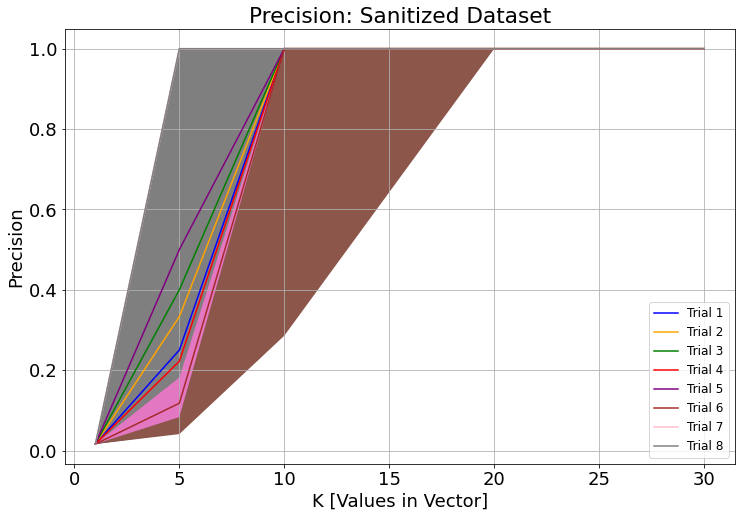

<Figure size 864x576 with 0 Axes>

In [24]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0])

ax.set_title('Precision: Sanitized Dataset')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')

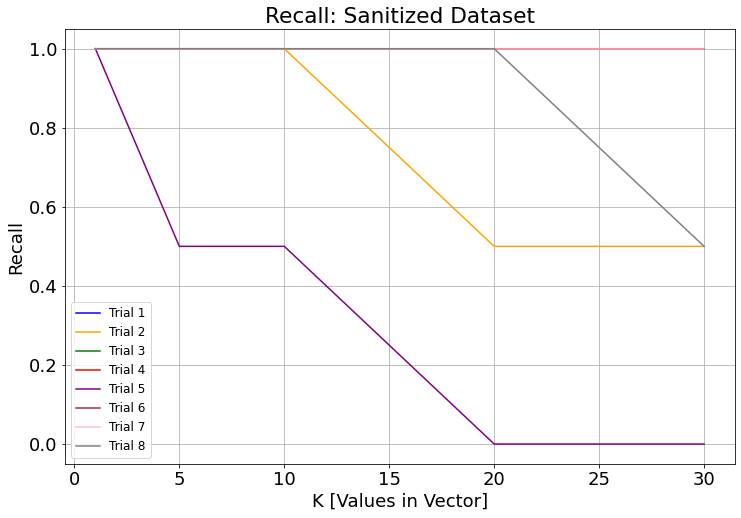

<Figure size 864x576 with 0 Axes>

In [25]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1])

ax.set_title('Recall: Sanitized Dataset')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower left')
ax.grid(visible=True, which='both')

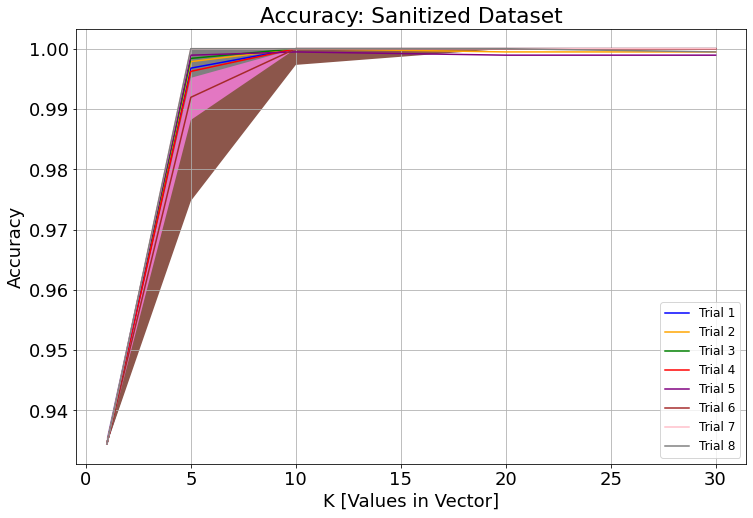

<Figure size 864x576 with 0 Axes>

In [26]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2])

ax.set_title('Accuracy: Sanitized Dataset')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')

## BlockRR, Memoization

In [18]:
PM_df = pd.DataFrame()

for key in sanProfilesM.keys():
    for val in sanProfilesM[key]:
        PM_df = PM_df.append(pd.Series([key, val]), ignore_index=True)
PM_df.columns = ['Id', 'FairlyActiveMinutes']

res_PM_df = run_n_attacks(PM_df, 8, sample_size=2)

SANITY CHECK:
6962181067.0 in training_IDs: False
8583815059.0 in training_IDs: False
2320127002.0 in training_IDs: True
5553957443.0 in training_IDs: True
TEST IDs:

[6962181067.0, 8583815059.0]
TEST VALS 1
[ 13.  23.   4.   4.   1.  11.  42.  45.   6.  22.  35.  45.   4.  30.
   8.  31. 125.  19.  16.   4.  33.  36.  36.  23.   4.   4.  13.  20.
  35.   8. 125.]

TEST VALS 2
[  5.  22.   2.   2.   2.   2. 147.  16.  25.  91.  50.  41.  41.   8.
  95.   3.  27.  63.  27.  59.   2.   2.   2.   2. 147.   2.  75.   8.
  46.  79.   2.]

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Correct number of positives found (2)!
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2,

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Correct number of positives found (2)!
Th=5, k=20: Correct number of positives found (2)!
Th=5, k=30: Incorrect number of positives... found (1) vs expected (2)
--------------------------------------------
END OF ATTACK NUMBER 7
--------------------------------------------

SANITY CHECK:
5577150313.0 in training_IDs: False
3977333714.0 in t

In [27]:
res_PM_df.fillna(0)
width = 0.8
num_trials = 8
my_xs = [1,5,10,20,30]
ths = [0,2,5]
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_PM_df.loc[res_PM_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

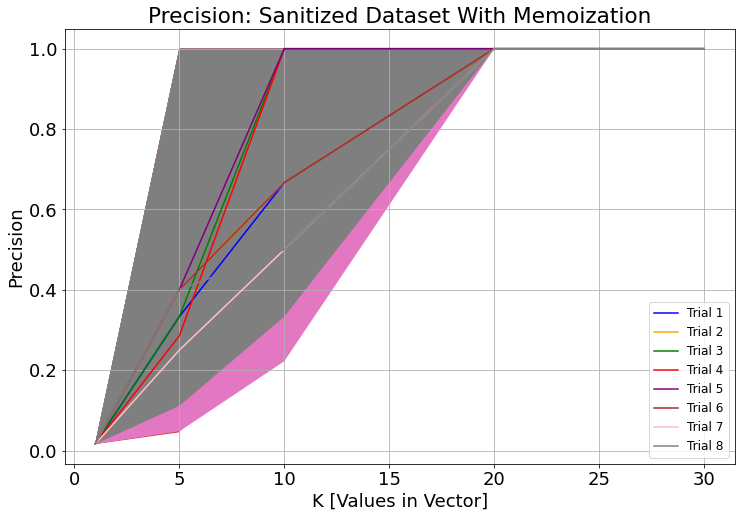

<Figure size 864x576 with 0 Axes>

In [28]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0])

ax.set_title('Precision: Sanitized Dataset With Memoization')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')

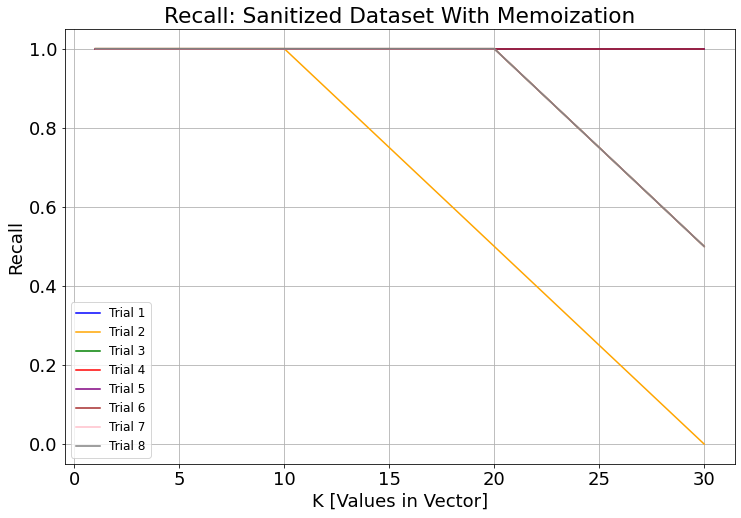

<Figure size 864x576 with 0 Axes>

In [29]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1])

ax.set_title('Recall: Sanitized Dataset With Memoization')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower left')
ax.grid(visible=True, which='both')

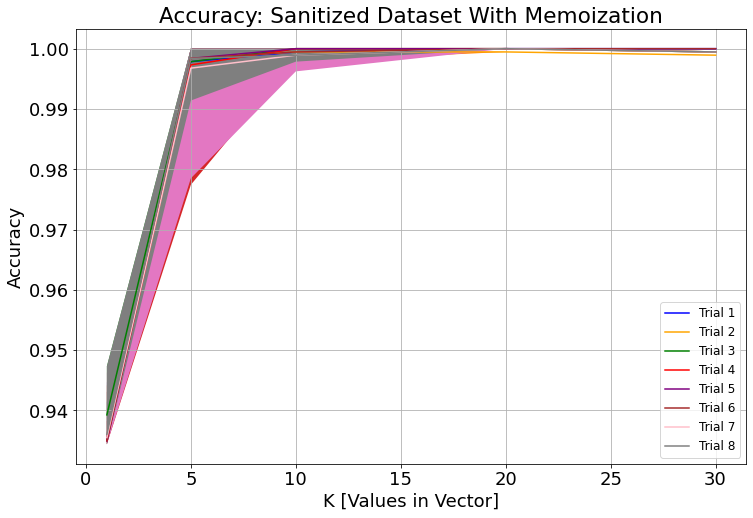

<Figure size 864x576 with 0 Axes>

In [30]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2])

ax.set_title('Accuracy: Sanitized Dataset With Memoization')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')